<a href="https://colab.research.google.com/github/nihalhabeeb/rental_bike_demand_prediction/blob/main/Soul_Bike_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Set Information:**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


**Attribute Information:**

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of the day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the dataset with latin1 encoding
df = pd.read_csv('/content/drive/MyDrive/Self Projects/Soul Bike Data/SeoulBikeData.csv', encoding = 'latin1')

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

There are no null values in the dataset.

In [5]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# renaming columns for simplicity
df.rename(columns = {'Date':'date','Rented Bike Count':'rented_bike_count','Hour':'hour',
                     'Temperature(°C)':'temperature','Humidity(%)':'humidity',
                     'Wind speed (m/s)':'wind_speed','Visibility (10m)':'visibility',
                     'Dew point temperature(°C)':'dew_point_temp','Solar Radiation (MJ/m2)':'solar_radiation',
                     'Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall','Seasons':'season','Holiday':'holiday',
                     'Functioning Day':'functioning_day'}, inplace = True)

In [7]:
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,season,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
# converting date to datetime format
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))

In [9]:
# creating a new column for year
df['year'] = df['date'].apply(lambda x: x.year)

In [10]:
# creating a new column for month
df['month'] = df['date'].apply(lambda x: x.strftime('%B'))

In [11]:
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,season,holiday,functioning_day,year,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December


## EDA

### year

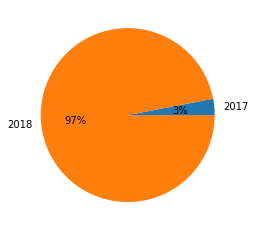

In [12]:
# percentage of rented bikes in each year
plt.pie(df.groupby('year')['rented_bike_count'].sum(),labels=['2017','2018'],autopct='%.0f%%')
plt.show()

The total number of rented bikes is way higher in 2018. This is because most of the data is from that year.

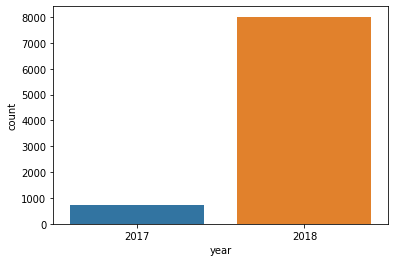

In [13]:
# count of data from each year
sns.countplot(data = df, x = 'year')

### month

Text(0.5, 1.0, 'Number of Rented Bikes vs Month')

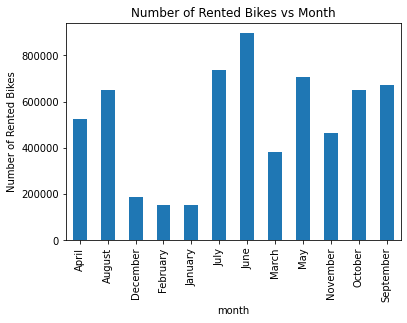

In [14]:
# total rented bikes in each month
df.groupby('month')['rented_bike_count'].sum().plot(kind='bar')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes vs Month')

June followed by July and May (summer season) has the most bikes rented. January, February and December (winter) has the least number of bikes rented.

### hour

Text(0.5, 1.0, 'Number of Rented Bikes vs Hour of the Day')

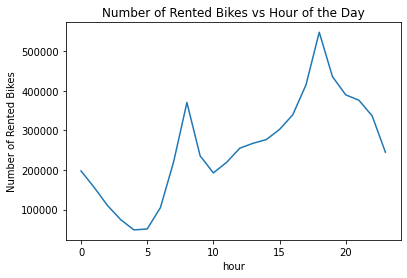

In [15]:
# total rented bikes in each hour
df.groupby('hour')['rented_bike_count'].sum().plot(kind = 'line')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes vs Hour of the Day')

The peak time of the day in terms of bikes rented is around 4-7 pm in the evening. There is a smaller peak in the morning (around 7-9 am). The least activity is during the early morning period.

### seasons

Text(0.5, 1.0, 'Number of Rented Bikes vs Season')

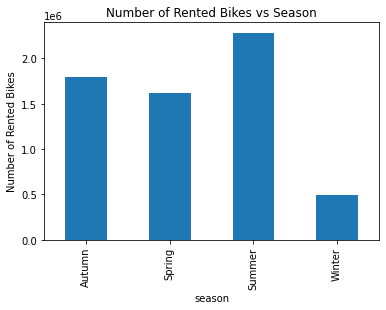

In [16]:
# total rented bikes in each seasons
df.groupby('season')['rented_bike_count'].sum().plot(kind = 'bar')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes vs Season')

Summer has highest activity and winter has the least activity.

### holiday

Text(0.5, 1.0, 'Number of Rented Bikes vs Holiday')

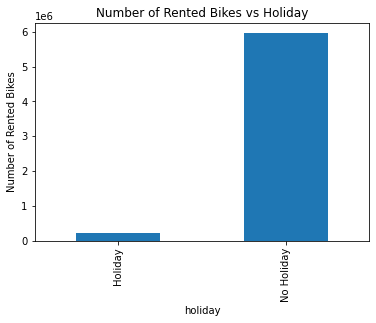

In [17]:
# total rented bikes by holiday
df.groupby('holiday')['rented_bike_count'].sum().plot(kind = 'bar')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes vs Holiday')

The number of rented bikes is very low on holidays

### Non functioning days

In [18]:
# data from the days when the service is not functioning
df[df['functioning_day'] == 'No']

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,season,holiday,functioning_day,year,month
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,April
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,April
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,April
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,April
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,2018,November
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,2018,November
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,November
8254,2018-11-09,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,November


It is expected that the rented bike count will be zero on the days when the service is not functioning (the same count of data below shows that).

In [19]:
# data count where the day is not functioning
df.loc[df['functioning_day'] == 'No'].shape

(295, 16)

In [20]:
# data count where the day is not functioning and the count of rented bikes is zero
df.loc[(df['functioning_day'] == 'No') & (df['rented_bike_count'] == 0)].shape

(295, 16)

But which are the days when the service is not functioning?

In [21]:
# the days when the service is not functioning
df[df['functioning_day'] == 'No'].groupby('date').size()

date
2018-04-11    24
2018-05-10    24
2018-09-18    24
2018-09-19    24
2018-09-28    24
2018-09-30    24
2018-10-02    24
2018-10-04    24
2018-10-06     7
2018-10-09    24
2018-11-03    24
2018-11-06    24
2018-11-09    24
dtype: int64

In most of the days above, the data size (count) is 24 which accounts for the 24 hours in a day. But interestingly, on 6 Oct 2018, the count is 7. This could be an error in the data or the day was partially functional. Let's have a look.

In [22]:
df[df['date'] == '2018-10-06'].head(10)

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,season,holiday,functioning_day,year,month
7416,2018-10-06,0,0,16.4,94,1.8,1744,15.4,0.00,1.0,0.0,Autumn,No Holiday,No,2018,October
7417,2018-10-06,0,1,16.7,89,2.4,1814,14.8,0.00,1.0,0.0,Autumn,No Holiday,No,2018,October
7418,2018-10-06,0,2,16.9,88,2.5,2000,14.8,0.00,1.5,0.0,Autumn,No Holiday,No,2018,October
7419,2018-10-06,0,3,16.8,90,3.3,1601,15.1,0.00,2.0,0.0,Autumn,No Holiday,No,2018,October
7420,2018-10-06,0,4,16.9,89,2.7,1577,15.0,0.00,2.5,0.0,Autumn,No Holiday,No,2018,October
7421,2018-10-06,0,5,16.7,93,2.8,360,15.5,0.00,4.5,0.0,Autumn,No Holiday,No,2018,October
7422,2018-10-06,0,6,16.5,96,2.3,417,15.8,0.00,8.5,0.0,Autumn,No Holiday,No,2018,October
7423,2018-10-06,5,7,16.5,97,2.3,364,16.0,0.00,9.5,0.0,Autumn,No Holiday,Yes,2018,October
7424,2018-10-06,6,8,16.6,97,2.0,457,16.1,0.01,9.0,0.0,Autumn,No Holiday,Yes,2018,October
7425,2018-10-06,5,9,16.7,97,2.9,550,16.2,0.05,6.0,0.0,Autumn,No Holiday,Yes,2018,October


Also, we can see that the non functioning days are not necessarily holidays. Most of the data (each representing an hour) corresponds to non-holidays.

In [23]:
# number of data (each representing an hour) where the day is not functional and not holiday
df.loc[(df['functioning_day'] == 'No') & (df['holiday'] == 'No Holiday')].shape

(271, 16)

The data of non functioning days can be removed as the rental bike count is surely zero those days. It does not help in predicting bike demands based on features (apart from the obvious fact that the bikes rented will be zero when the service is non functional). In addition, the model predictions can help decide if it is okay to stop the service on certain days (based on the demands). 

In [24]:
# copy of the dataset
data = df.copy()

In [25]:
# only including data where the day is functioning
data.drop(data[data['functioning_day'] == 'No'].index, inplace = True)

In [26]:
data.shape

(8465, 16)

In [27]:
df.shape

(8760, 16)

In [28]:
# dropping the functioning_day column as it is now redundant
data.drop(columns = ['functioning_day'], axis = 1, inplace = True)

In [29]:
data.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,season,holiday,year,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,December
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,December
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,2017,December
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,December
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,2017,December


### Linear relationship

In [30]:
# descriptve statistics
data.describe()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,year
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685,2017.912109
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063,0.283154
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000,2017.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000,2018.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000,2018.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000,2018.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000,2018.000000


In [31]:
# list of numerical features
numerical_features = list(data.describe().columns)
numerical_features.remove('rented_bike_count')
numerical_features

['hour',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'year']

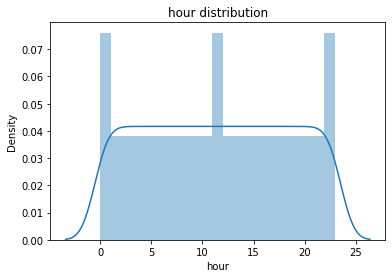

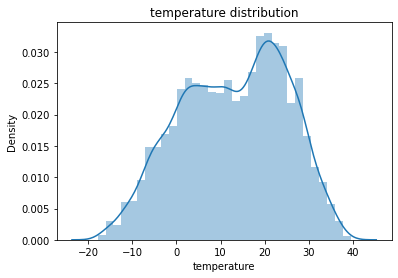

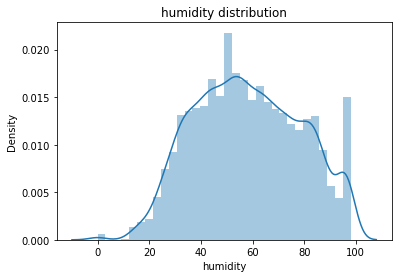

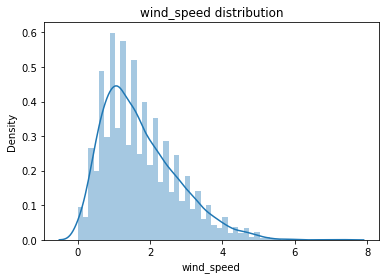

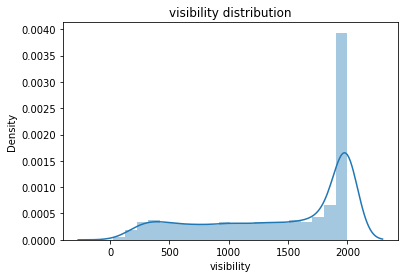

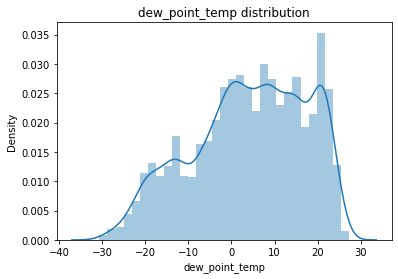

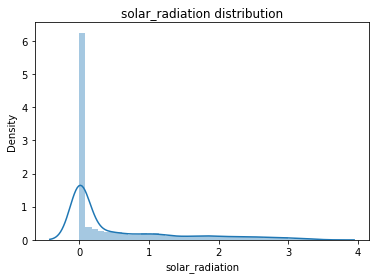

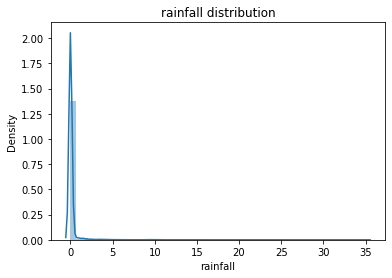

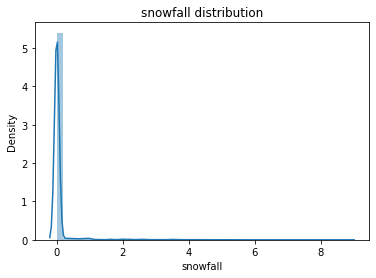

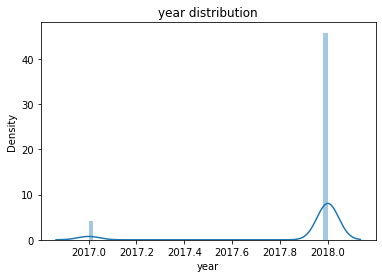

In [32]:
# distribution of numerical features
for column in numerical_features:
  sns.distplot(df[column])
  plt.title(column + ' distribution')
  plt.show()

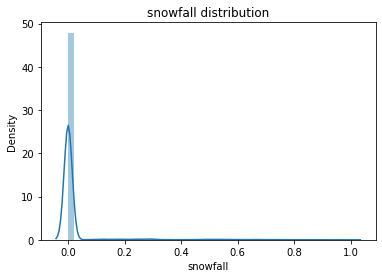

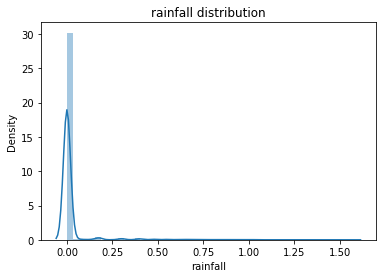

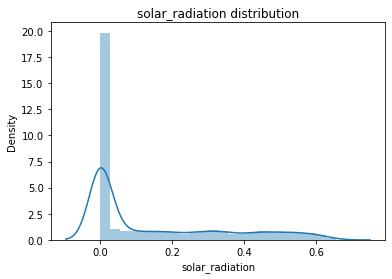

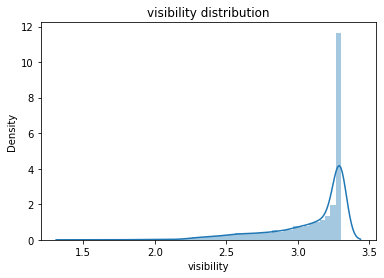

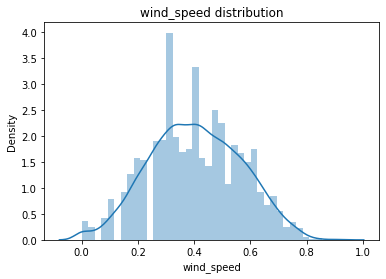

In [33]:
# distribution of numerical features (log transformation)
for column in ['snowfall','rainfall','solar_radiation','visibility','wind_speed']:
  sns.distplot(np.log10(df[column]+1))
  # sns.distplot(df[column])
  plt.title(column + ' distribution')
  plt.show()

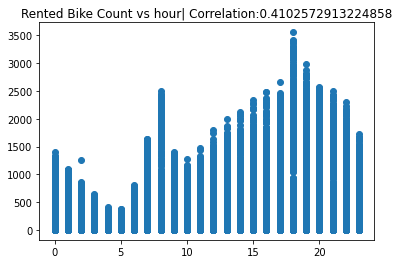

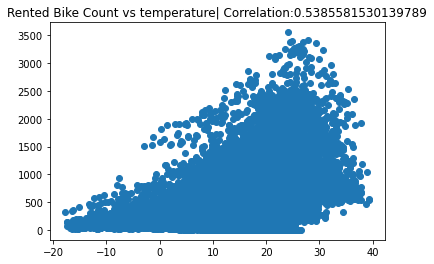

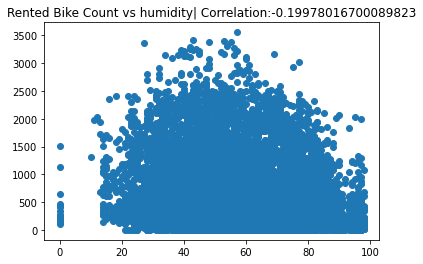

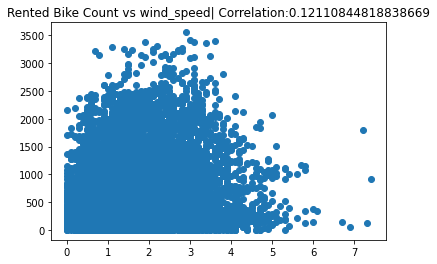

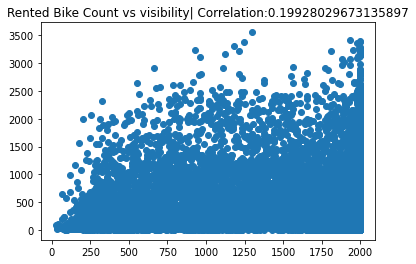

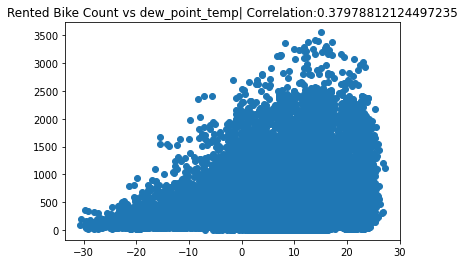

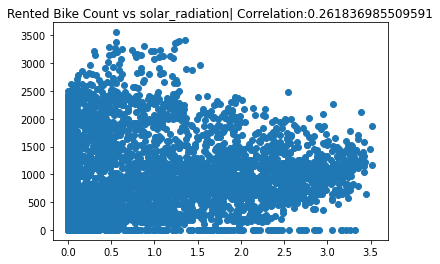

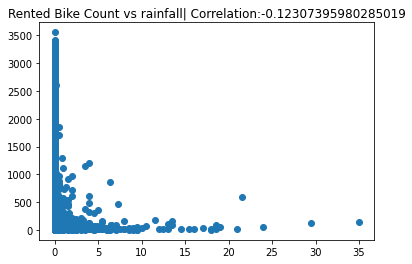

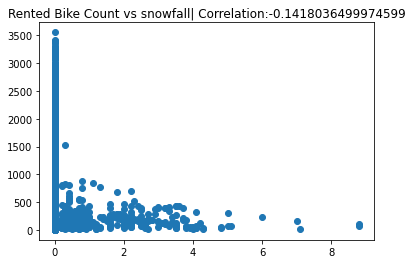

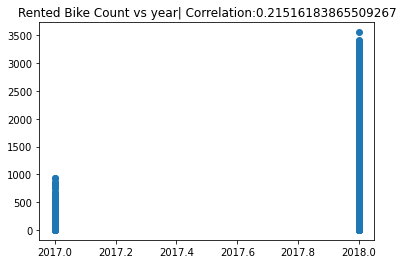

In [34]:
for column in numerical_features:
  plt.scatter(df[column], df['rented_bike_count'])
  correlation = df[column].corr(df['rented_bike_count'])
  plt.title('Rented Bike Count vs ' + column + "| Correlation:" + str(correlation))
  plt.show()

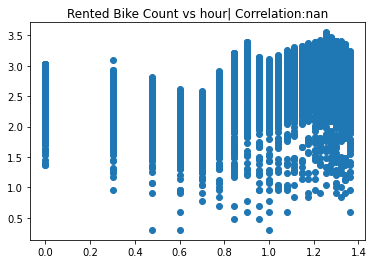

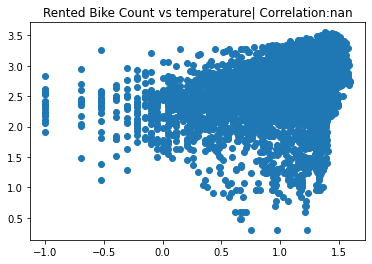

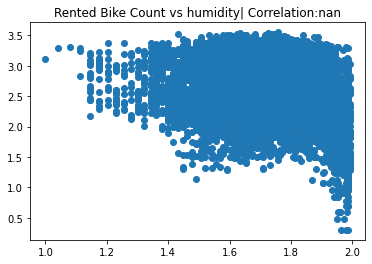

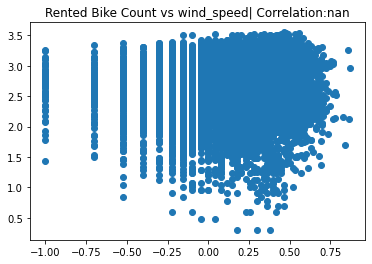

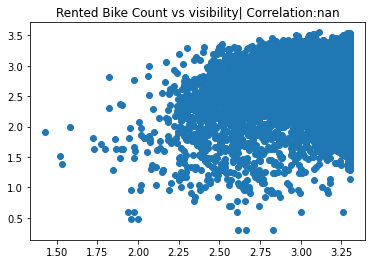

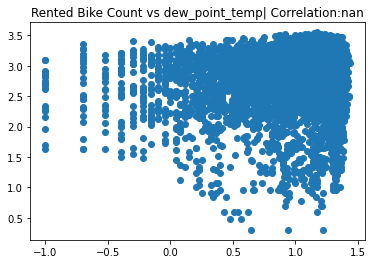

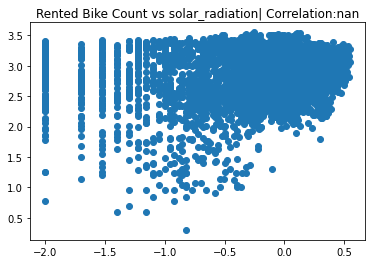

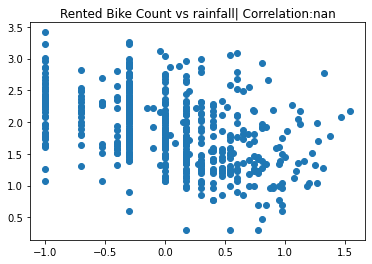

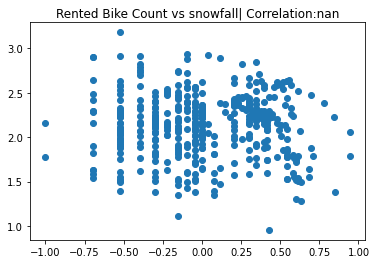

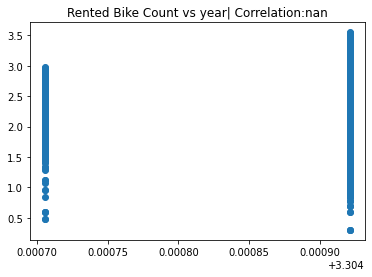

In [35]:
for column in numerical_features:
  feature = np.log10(df[column])
  label = np.log10(df['rented_bike_count'])
  plt.scatter(feature, label)
  correlation = feature.corr(label)
  plt.title('Rented Bike Count vs ' + column + "| Correlation:" + str(correlation))
  plt.show()

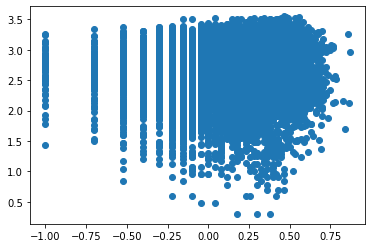

In [36]:
# log transformation
plt.scatter(np.log10(df['wind_speed']),np.log10(df['rented_bike_count']))

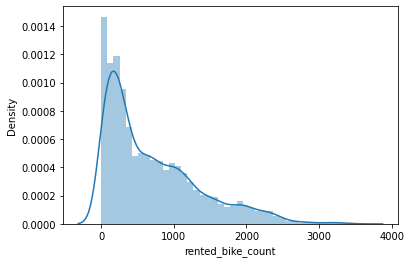

In [37]:
# distribution of the target variable
sns.distplot(df['rented_bike_count'])

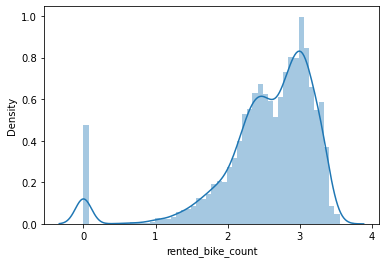

In [38]:
# distribution of log transformation of target variable
sns.distplot(np.log10(df['rented_bike_count']+1))

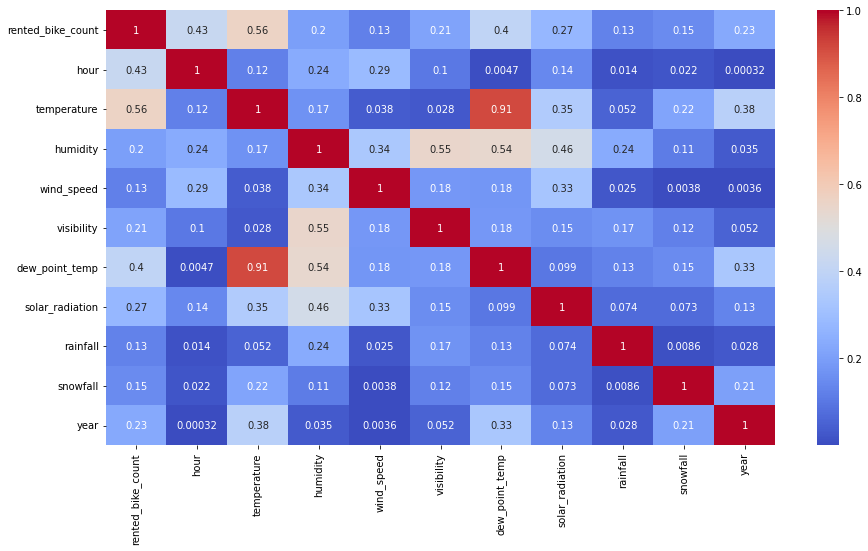

In [39]:
# correlation heatmap
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Temperature and dew point temperature are highly correlated. One of them have to be removed.

In [40]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [41]:
calc_vif(data[[i for i in numerical_features]])

,variables,VIF
0,hour,4.443403
1,temperature,185.258460
2,humidity,182.640615
3,wind_speed,4.822979
4,visibility,10.307273
5,dew_point_temp,126.801595
6,solar_radiation,2.871067
7,rainfall,1.103420
8,snowfall,1.129955
9,year,389.526957


In [42]:
calc_vif(data[[i for i in numerical_features if i not in ['dew_point_temp','year']]])

,variables,VIF
0,hour,3.942900
1,temperature,3.160803
2,humidity,4.825493
3,wind_speed,4.619041
4,visibility,4.711124
5,solar_radiation,2.233873
6,rainfall,1.080363
7,snowfall,1.122734


In [43]:
selected_num_features = ['hour','temperature','humidity','wind_speed','visibility','solar_radiation','rainfall','snowfall']

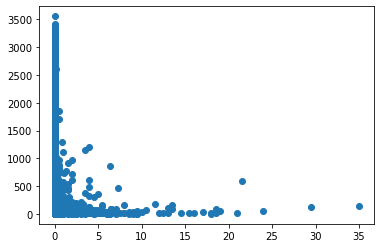

In [44]:
plt.scatter(df['rainfall'],df['rented_bike_count'])

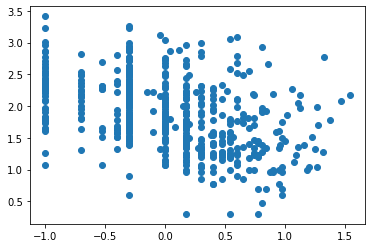

In [45]:
plt.scatter(np.log10(df['rainfall']),np.log10(df['rented_bike_count']))

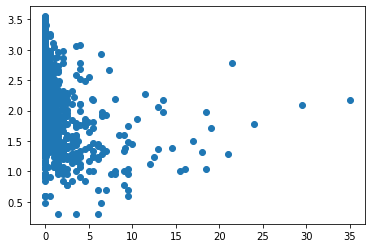

In [46]:
plt.scatter(df['rainfall'],np.log10(df['rented_bike_count']))

### non numerical features

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               8465 non-null   datetime64[ns]
 1   rented_bike_count  8465 non-null   int64         
 2   hour               8465 non-null   int64         
 3   temperature        8465 non-null   float64       
 4   humidity           8465 non-null   int64         
 5   wind_speed         8465 non-null   float64       
 6   visibility         8465 non-null   int64         
 7   dew_point_temp     8465 non-null   float64       
 8   solar_radiation    8465 non-null   float64       
 9   rainfall           8465 non-null   float64       
 10  snowfall           8465 non-null   float64       
 11  season             8465 non-null   object        
 12  holiday            8465 non-null   object        
 13  year               8465 non-null   int64         
 14  month   

In [48]:
data.describe(include = ['category','object'])

,season,holiday,month
count,8465,8465,8465
unique,4,2,12
top,Summer,No Holiday,December
freq,2208,8057,744


In [49]:
categorical_features = list(data.describe(include = ['object','category']).columns)
categorical_features

['season', 'holiday', 'month']

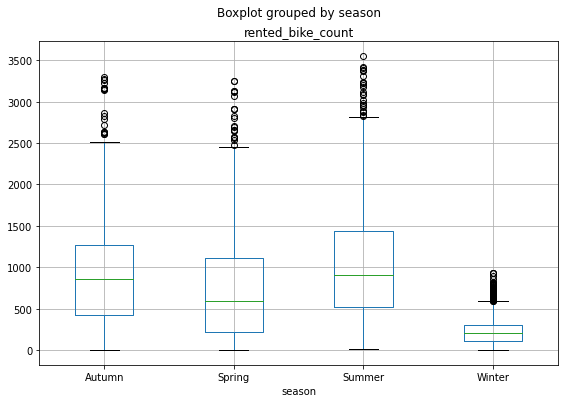

In [50]:
# rented bike count and season
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
data.boxplot(column = 'rented_bike_count', by = 'season', ax = ax)

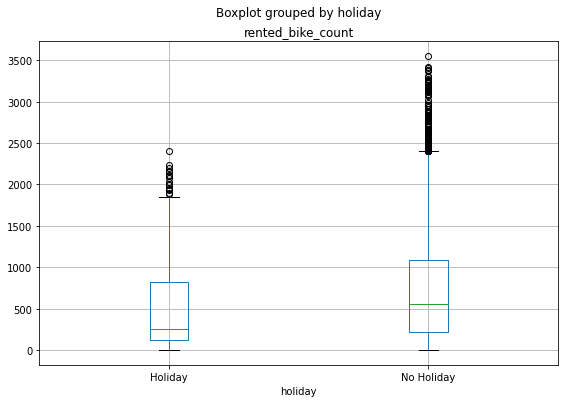

In [51]:
# rented bike count and holiday
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
data.boxplot(column = 'rented_bike_count', by = 'holiday', ax = ax)

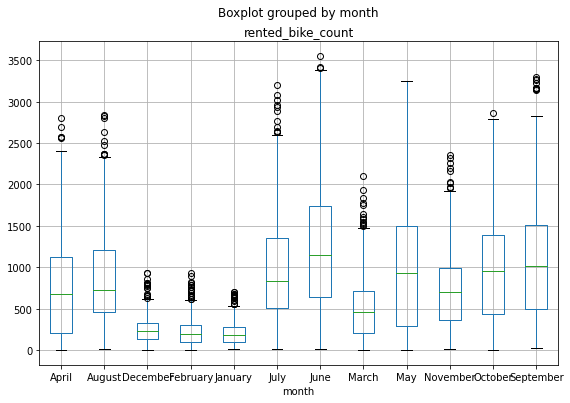

In [52]:
# rented bike count and month
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
data.boxplot(column = 'rented_bike_count', by = 'month', ax = ax)

### Data encoding

In [53]:
# dropping the month column were month is represented by their names
data.drop(columns=['month'], axis = 1, inplace=True)

In [54]:
# creating a new month column were month is represented by numbers
data['month'] = data['date'].apply(lambda x: x.month)

In [55]:
# label encoding
label_encoders = {"holiday":{"No Holiday":0,"Holiday":1}}
data = data.replace(label_encoders)

In [56]:
# one hot encoding
data = pd.get_dummies(data, columns=["season"], prefix=["season"], drop_first=True)

## Fitting the model

In [57]:
data.tail()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,holiday,year,month,season_Spring,season_Summer,season_Winter
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,2018,11,0,0,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,2018,11,0,0,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,2018,11,0,0,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,2018,11,0,0,0
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,0,2018,11,0,0,0


In [58]:
# removing snowfall and rainfall (as they dont have linear relationship)
selected_num_features.remove('snowfall')
selected_num_features.remove('rainfall')
selected_num_features

['hour',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'solar_radiation']

In [59]:
selected_num_features.extend(['month','holiday','season_Spring','season_Summer','season_Winter'])

In [60]:
# defining data of independent variables and dependent variables
X = data[selected_num_features].values
y = data['rented_bike_count'].values

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [65]:
# splitting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [66]:
# scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# r2 score for training set
model.score(X_train,y_train)

0.5343704874448071

In [69]:
# r2 score for testing set
model.score(X_test,y_test)

0.5117558744340123

In [70]:
model.intercept_

241.76677172742774

In [71]:
model.coef_

array([ 640.84533526, 1548.5725967 , -904.45551662,  123.52385395,
         28.53701739, -300.85179337,   56.06544079, -129.46097105,
       -108.60079068, -143.30198688, -330.23604208])

In [72]:
# predciting using the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [73]:
# performance metrics
mean_squared_error(y_test, y_pred)

206455.33638489357

## Fitting Decision Tree

In [132]:
# making a copy of the dataset
data2 = df.copy()

In [133]:
data2.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,season,holiday,functioning_day,year,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December


In [134]:
# only taking data where the day is functional
data2.drop(data2[data2['functioning_day'] == 'No'].index, inplace = True)

In [135]:
# dropping the functioning_day column as it is redundant
data2.drop(['functioning_day'], axis = 1, inplace = True)

In [136]:
# dropping the month column were month is represented by their names
data2.drop(columns=['month'], axis = 1, inplace=True)

# creating a new month column were month is represented by numbers
data2['month'] = data2['date'].apply(lambda x: x.month)

In [137]:
# dropping date and year column
data2.drop(['date','year'], axis = 1, inplace = True)

### conversion to appropriate data types

DecisionTreeRegressor accepts only numerical values. The categorical values have to be converted to numerical form

In [122]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  8465 non-null   int64  
 1   hour               8465 non-null   int64  
 2   temperature        8465 non-null   float64
 3   humidity           8465 non-null   int64  
 4   wind_speed         8465 non-null   float64
 5   visibility         8465 non-null   int64  
 6   dew_point_temp     8465 non-null   float64
 7   solar_radiation    8465 non-null   float64
 8   rainfall           8465 non-null   float64
 9   snowfall           8465 non-null   float64
 10  season             8465 non-null   int64  
 11  holiday            8465 non-null   int64  
 12  month              8465 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 925.9 KB


In [145]:
# label encoding
label_encoders = {"holiday":{"No Holiday":0,"Holiday":1}, "season":{"Winter":0,"Spring":1,"Summer":2,"Autumn":3}}
data2 = data2.replace(label_encoders)

### Fitting the model

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
independent_variables = ['hour','temperature','humidity','wind_speed','visibility','dew_point_temp','solar_radiation','rainfall','snowfall','season','holiday','month']

In [147]:
# dataset of independent variables
X = data2[independent_variables]
# dataset of dependent variables
y = data2['rented_bike_count']

In [148]:
print(X.shape)
print(y.shape)

(8465, 12)
(8465,)


In [149]:
# splitting the data to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [150]:
print(X_train.shape)
print(y_train.shape)

(5671, 12)
(5671,)


In [143]:
decision_tree_reg = DecisionTreeRegressor(max_leaf_nodes=10, random_state=12)

In [151]:
# fitting the model
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=12)

In [152]:
# prediction
y_train_pred2 = decision_tree_reg.predict(X_train)
y_test_pred2 = decision_tree_reg.predict(X_test)

In [156]:
import math

In [160]:
# performance metrics for testing set
# r2_score
print("r2 score:",r2_score(y_test,y_test_pred2))
# rmse
print("RMSE:", math.sqrt(mean_squared_error(y_test,y_test_pred2)))

r2 score: 0.6706884195520755
RMSE: 372.386260902187


In [161]:
# performance metrics for training set
# r2_score
print("r2 score:",r2_score(y_train,y_train_pred2))
# rmse
print("RMSE:", math.sqrt(mean_squared_error(y_train,y_train_pred2)))

r2 score: 0.6923989232011433
RMSE: 354.381016935705


### Random Forest